In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [10]:
eğitim = pd.read_csv("eğitimdolu.csv",index_col=0)

# ÖDEV1
Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [12]:
pd.options.display.float_format = '{:.3f}'.format      
eğitim.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,...,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000,1492.000
mean,2004.434,916088.780,9102955.817,767501.624,4221673.716,4113780.470,9207612.025,4768521.991,2683483.112,429455.641,...,64553.298,64298.934,54307.469,519340.126,247218.583,802710.424,235.493,278.957,219.116,263.653
std,7.394,966772.875,10881550.610,1061074.797,5135476.817,5079534.051,11097264.402,5830108.476,3106802.923,484684.895,...,76685.013,75364.355,64838.448,614713.416,293877.705,912656.994,6.380,6.205,4.695,3.929
min,1992.000,43866.000,465650.000,31020.000,0.000,22093.000,481665.000,265549.000,139963.000,11541.000,...,633.000,437.000,311.000,4878.000,1808.000,7254.000,187.135,232.832,178.558,236.379
25%,1998.000,315094.000,2546260.750,217020.000,1356434.000,944796.250,2523968.500,1343611.250,767368.750,135428.250,...,15195.500,15682.750,13437.000,121152.250,59197.500,229357.750,236.159,279.448,219.365,263.667
50%,2004.000,820414.000,6334640.000,511251.000,3106753.500,2632297.500,6438460.000,3287151.500,1902906.000,367233.500,...,49884.500,49571.000,39566.000,401586.500,181701.000,647326.000,236.159,279.448,219.365,263.667
75%,2011.000,921178.000,9281205.747,785848.724,4304868.784,4188903.149,9434922.000,4938819.750,2795887.500,456891.500,...,71814.250,72131.000,64616.250,574911.750,282539.000,872422.000,236.159,279.448,219.365,263.667
max,2017.000,6307022.000,89217262.000,9990221.000,50904567.000,36105265.000,85320133.000,43964520.000,26058021.000,3995951.000,...,493415.000,500143.000,498403.000,3929869.000,2013687.000,5944746.000,253.421,300.568,236.774,280.499


In [14]:
eğitim.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


In [15]:
eğitim["BUDGET_DEFİCİT"]=eğitim['TOTAL_REVENUE']-eğitim['TOTAL_EXPENDITURE']
eğitim["W_BUDGET_DEFİCİT"]=winsorize(eğitim["BUDGET_DEFİCİT"], (0,0.1))
eğitim["W_TOTAL_REVENUE"]= winsorize(eğitim["TOTAL_REVENUE"], (0, 0.1))
eğitim["W_TOTAL_EXPENDITURE"]= winsorize(eğitim["TOTAL_EXPENDITURE"], (0, 0.1))
eğitim.head(1)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFİCİT,W_BUDGET_DEFİCİT,W_TOTAL_REVENUE,W_TOTAL_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,920139.300,2678885.000,304177.000,1659028.000,715680.000,2653798.000,1481703.000,...,196386.000,676174.000,208.328,252.188,207.964,263.307,25087.000,25087.000,2678885.000,2653798.000


In [16]:
eğitim.to_csv('w_eğitim.csv', encoding = 'utf8')

In [19]:
plt.figure(figsize=(20,30))
baslik_font = {'family': 'arial', 'color': 'red','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'blue','weight': 'bold','size': 10 }

degiskenler = ["BUDGET_DEFİCİT", 'TOTAL_REVENUE' , 'TOTAL_EXPENDITURE']
winsorize_degiskenler = ["W_BUDGET_DEFİCİT", "W_TOTAL_REVENUE", "W_TOTAL_EXPENDITURE"]

<Figure size 2000x3000 with 0 Axes>

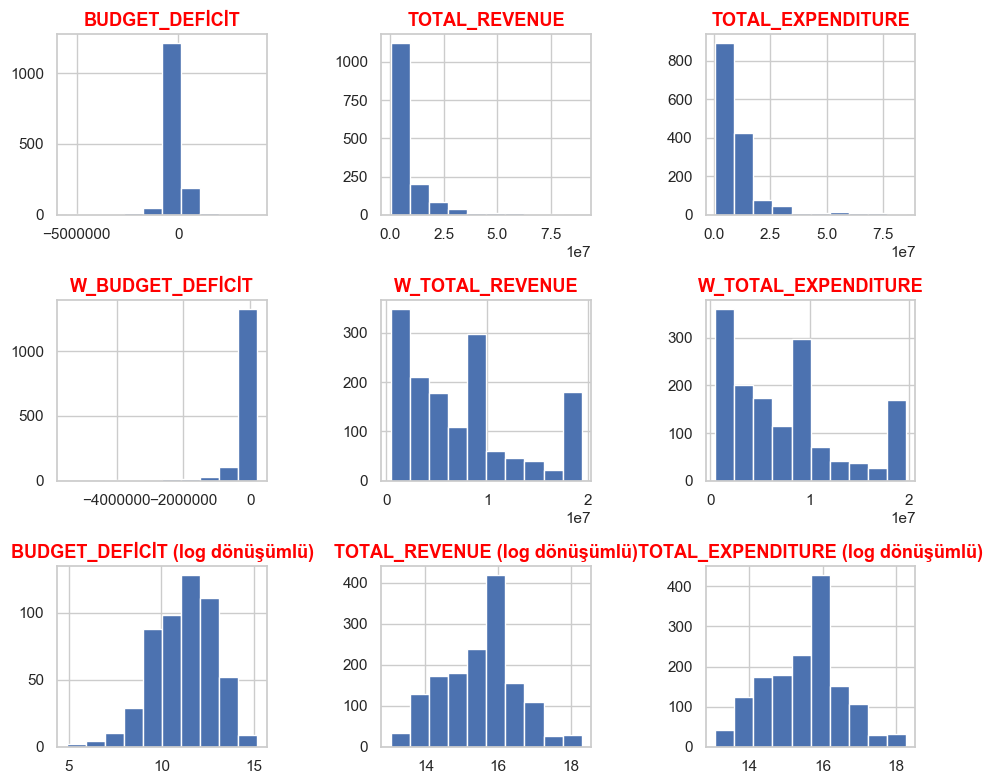

In [20]:
plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(eğitim[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(eğitim[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(eğitim[degiskenler[i]]))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)
plt.tight_layout()
plt.show()

In [21]:
!pip install wordcloud
warnings.filterwarnings('ignore')

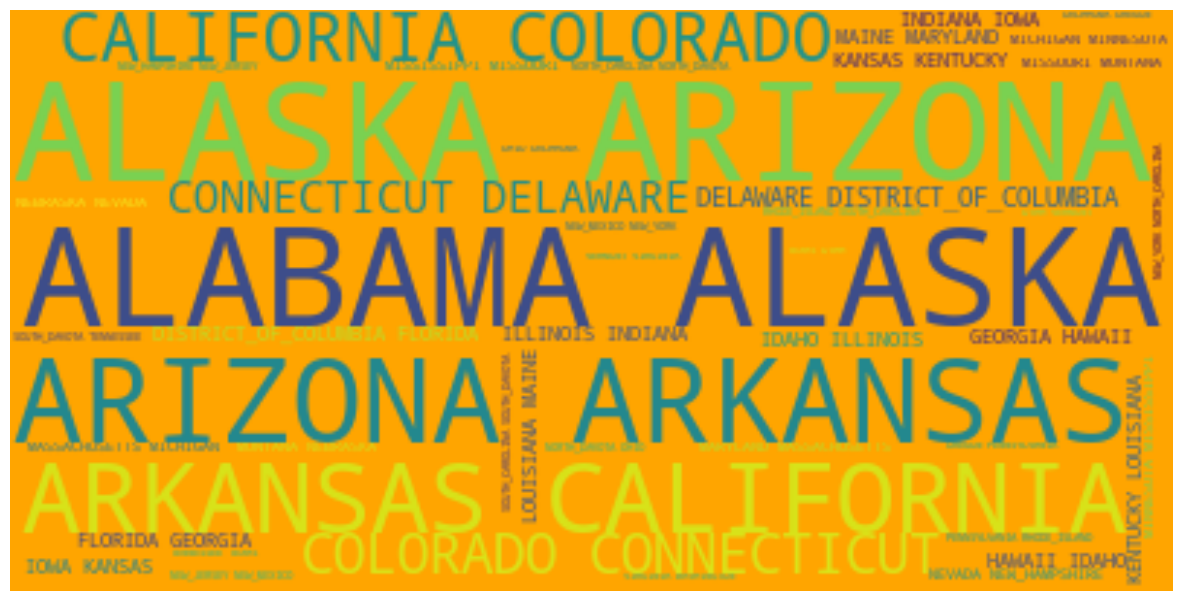

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="orange").generate(" ".join(eğitim["STATE"]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Ödev2
Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

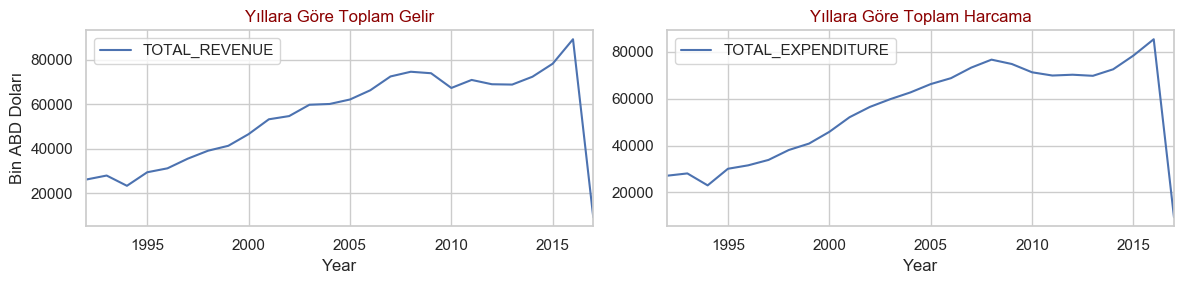

In [26]:
CALIFORNIA=eğitim[eğitim['STATE'] == "CALIFORNIA"]
col1=['TOTAL_REVENUE']
col2=['TOTAL_EXPENDITURE']
f, ax = plt.subplots(1,2, figsize=[12,3])
for i,x in enumerate([col1,col2]):
    (CALIFORNIA[x+["YEAR"]].groupby(["YEAR"]).mean()/1000).plot(ax=ax[i])
    ax[i].set_xlabel("Year")
    color="pink","grey"
ax[0].set_title("Yıllara Göre Toplam Gelir",c="darkred")
ax[1].set_title("Yıllara Göre Toplam Harcama",c="darkred")
ax[0].set_ylabel("Bin ABD Doları")
plt.tight_layout()
plt.show()

# Ödev3
Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

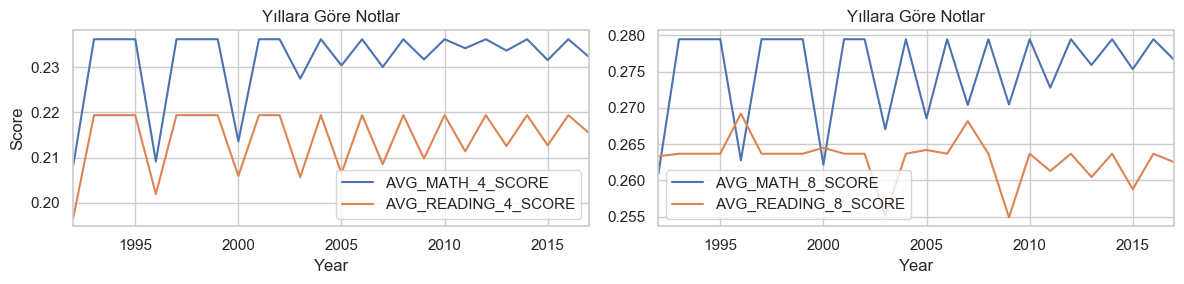

In [28]:
col1=['AVG_MATH_4_SCORE','AVG_READING_4_SCORE']
col2=['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']
f, ax = plt.subplots(1,2, figsize=[12,3])
for i,x in enumerate([col1,col2]):
    (CALIFORNIA[x+["YEAR"]].groupby(["YEAR"]).mean()/1000).plot(ax=ax[i])
    ax[i].set_title("Yıllara Göre Notlar")
    ax[i].set_xlabel("Year")
ax[0].set_ylabel("Score")
plt.tight_layout()
plt.show()

In [29]:
CALIFORNIA[['AVG_MATH_4_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
count,26.000,26.000,26.000,26.000
mean,231.717,214.520,275.178,262.975
std,8.276,6.694,6.211,3.043
min,208.399,196.764,260.892,254.895
25%,231.581,210.161,271.029,263.397
50%,236.159,219.365,279.448,263.667
75%,236.159,219.365,279.448,263.667
max,236.159,219.365,279.448,269.197


# Ödev4
Matematik ve okuma notlarının dağılımı nedir?

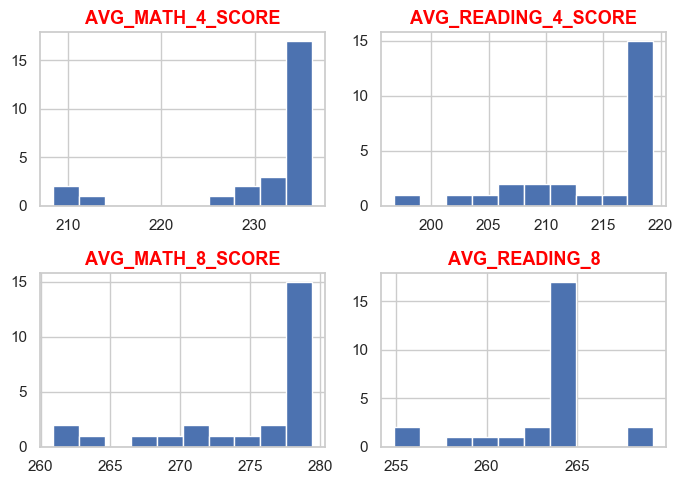

In [33]:
plt.figure(figsize=(7,5))

plt.subplot(221)
plt.hist(CALIFORNIA['AVG_MATH_4_SCORE'])
plt.title("AVG_MATH_4_SCORE", fontdict=baslik_font)
    
plt.subplot(222)
plt.hist(CALIFORNIA['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE', fontdict=baslik_font)
    
plt.subplot(223)
plt.hist(CALIFORNIA['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE', fontdict=baslik_font)
    
plt.subplot(224)
plt.hist(CALIFORNIA['AVG_READING_8_SCORE'])
plt.title("AVG_READING_8", fontdict=baslik_font)
    
plt.tight_layout()
plt.show()

# Ödev5
Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [35]:
egitim1 = pd.read_csv("states_all.csv")

In [37]:
CALIFORNIA=egitim1[egitim1['STATE'] == "ALABAMA"]
unique_count = []
degerler=CALIFORNIA[['AVG_MATH_4_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE']]
for x in degerler:
    unique_count.append([x,len(degerler[x].unique()),degerler[x].isnull().sum()])
    
print("Dataframe Dimension: {} Rows, {} Columns".format(*degerler.shape))
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Dataframe Dimension: 26 Rows, 4 Columns


Column,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
Unique,12,12,12,11
Missing,15,15,15,16


In [39]:
degerler_mean=CALIFORNIA[['AVG_MATH_4_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE']]
for col in degerler_mean:
       degerler_mean[col] = degerler_mean[col].transform(lambda x: x.fillna(x.mean()))
degerler_mean

,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
0,208.328,207.964,252.188,264.081
51,224.555,213.235,263.888,264.081
102,224.555,213.235,263.888,264.081
153,224.555,213.235,263.888,264.081
204,211.647,210.921,256.595,260.276
255,224.555,213.235,263.888,264.081
306,224.555,213.235,263.888,264.081
357,224.555,213.235,263.888,264.081
408,217.941,206.880,262.158,258.777
459,224.555,213.235,263.888,264.081


In [40]:
count=[]
for x in degerler_mean:
    count.append([x,len(degerler_mean[x].unique()),degerler_mean[x].isnull().sum()])
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
Unique,12,12,12,11
Missing,15,15,15,16
